#### IMPORTING LIBRARIES

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

import warnings
warnings.filterwarnings('ignore')

### IMPORTING DATA

In [2]:
df=pd.read_csv('DATA.csv')
pd.set_option("display.max_columns",100)   #CHECK MAX COLUMNS
pd.options.display.float_format = "{:,.2f}".format  #limiting decimal points to 2
df.sample(2)


,ID,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
507028,85a37401-b785-4c49-b3c9-6b6d0ad18184,"1,543,426,509.00",17,28,11,11/28/2018 17:35,America/New_York,Theatre District,North End,Uber,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,7.00,1.57,1.00,42.36,-71.07,40.77,35.14,Overcast,Mostly cloudy throughout the day.,0.00,0.00,0.63,8.76,14.90,1543431600,10.00,42.57,1543438800,37.37,1543489200,36.55,1543438800,31.91,1543478400,cloudy,29.17,991.33,303,1.00,1,10.00,352.40,1543405938,1543439719,0.72,0.00,1543420800,33.70,1543399200,42.57,1543438800,29.94,1543399200,36.55,1543438800
368539,099dd16b-4bdb-461b-8c86-a79834619273,"1,543,447,928.00",23,28,11,11/28/2018 23:32,America/New_York,Back Bay,Boston University,Lyft,lyft_line,Shared,5.00,1.49,1.00,42.21,-71.03,39.35,33.00,Overcast,Mostly cloudy throughout the day.,0.00,0.00,0.69,9.63,14.39,1543446000,10.00,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,cloudy,29.86,995.30,293,1.00,0,10.00,355.00,1543405904,1543439738,0.72,0.00,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


### DATA PREPROCESSING


In [3]:
print('Size of Dataframe is :',df.size)  # Size of Data
print('Shape of Dataframe is :',df.shape)   #Shape of data

Size of Dataframe is : 39505047
Shape of Dataframe is : (693071, 57)


In [4]:
#Checking unique values in columns
df.nunique() 


ID                             693071
timestamp                       31196
hour                               24
day                                17
month                               2
datetime                         5977
timezone                            1
source                             12
destination                        12
cab_type                            2
product_id                         13
name                               13
price                             147
distance                          549
surge_multiplier                    7
latitude                           11
longitude                          12
temperature                       308
apparentTemperature               319
short_summary                       9
long_summary                       11
precipIntensity                    63
precipProbability                  29
humidity                           51
windSpeed                         291
windGust                          286
windGustTime

#timezone has only unique value, will consider to remove column

In [5]:
df.info()  #Other Data information like datatypes, memory allocation etc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

### Missing Value  

In [6]:
df.isnull().sum()

ID                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

#Price has only NAN value

In [7]:
df.fillna(df['price'].mean(),inplace=True) #filling NAN with mean of price column

In [8]:
#CHECKING CATEGORICAL COLUMNS

df.select_dtypes(include=['object']).columns


Index(['ID', 'datetime', 'timezone', 'source', 'destination', 'cab_type',
       'product_id', 'name', 'short_summary', 'long_summary', 'icon'],
      dtype='object')

In [9]:
df[['ID', 'datetime', 'timezone', 'source', 'destination', 'cab_type',
       'product_id', 'name', 'short_summary', 'long_summary', 'icon']].nunique()  

ID               693071
datetime           5977
timezone              1
source               12
destination          12
cab_type              2
product_id           13
name                 13
short_summary         9
long_summary         11
icon                  7
dtype: int64

### Checking Duplicate values

In [10]:
df.duplicated().sum()   

0

### Dropping some columns which are not relevant from above analysis

In [11]:
df.drop(['timezone','ID'],axis=1,inplace=True) #ID not of use and timezone has only 1 unique value i.e same time zone 

In [12]:
df['Minute']=pd.to_datetime(df['datetime']).dt.minute # Extracting minute 
df['Day']=pd.to_datetime(df['datetime']).dt.dayofweek # Extracting day i.e weekends


In [13]:
df.drop(['datetime'],axis=1, inplace=True) #already data in month ,day etc

### ENCODING Categorical column

In [14]:
from sklearn.preprocessing import LabelEncoder   #columns are ordinal hence using OneHotEncoder but my lappy is old not able to deal big data hence using Labelencoder
le=LabelEncoder()


In [15]:
for i in df:
    if df[i].dtype=='object':
        df[i]=le.fit_transform(df[i])

In [16]:
df.head(2)

,timestamp,hour,day,month,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,Minute,Day
0,"1,544,952,608.00",9,16,12,5,7,0,8,7,5.00,0.44,1.00,42.21,-71.03,42.34,37.12,4,9,0.00,0.00,0.68,8.66,9.17,1545015600,10.00,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,5,32.70,"1,021.98",57,0.72,0,10.00,303.80,1544962084,1544994864,0.30,0.13,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000,30,6
1,"1,543,284,024.00",2,27,11,5,7,0,12,2,11.00,0.44,1.00,42.21,-71.03,43.58,37.35,8,10,0.13,1.00,0.94,11.98,11.98,1543291200,4.79,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,6,41.83,"1,003.97",90,1.00,0,4.79,291.10,1543232969,1543266992,0.64,0.13,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600,0,1


### Feature Selection

In [17]:
#1 Univariate Analysis
# Dependent and Independent Feature
x=df.drop(['price'],axis=1)
x=abs(x)

y=df['price']

In [18]:
from sklearn.feature_selection import SelectKBest,f_regression

In [19]:
features_select=SelectKBest(score_func=f_regression,k='all')

In [20]:
features_select.fit(x,y)

SelectKBest(k='all', score_func=<function f_regression at 0x7f5bf6398790>)

In [21]:
feature_rank=pd.DataFrame(features_select.scores_,columns=['Scores'])
x_columns=pd.DataFrame(x.columns,columns=['Feature'])

In [22]:
feature_df=pd.concat([x_columns,feature_rank],axis=1)

top_05=feature_df.nlargest(5,'Scores')
top_05

,Feature,Scores
8,name,"337,658.14"
9,distance,"84,720.59"
10,surge_multiplier,"42,443.27"
6,cab_type,"4,516.50"
7,product_id,"3,129.55"


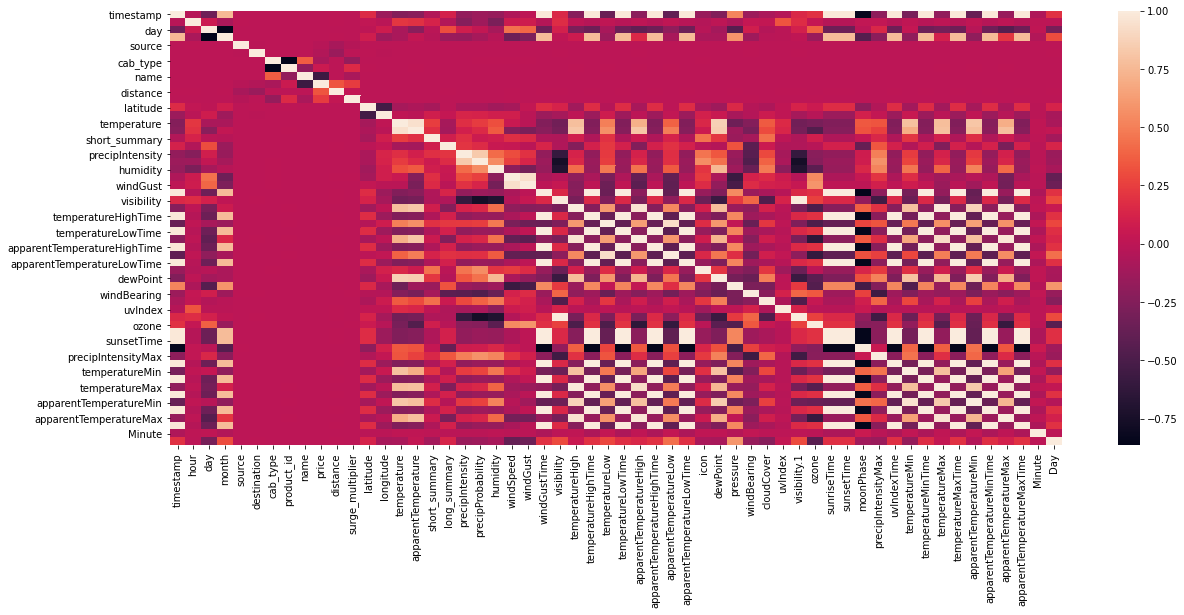

In [23]:
### Using Correlation heatmap

plt.figure(figsize=(20,8))
sns.heatmap(df.corr())
plt.show()

In [24]:
#top_05.set_index('Feature',inplace=True)

In [25]:
x_new=x[top_05['Feature']]


In [26]:
x_new

,name,distance,surge_multiplier,cab_type,product_id
0,7,0.44,1.00,0,8
1,2,0.44,1.00,0,12
2,5,0.44,1.00,0,7
3,4,0.44,1.00,0,10
4,6,0.44,1.00,0,11
...,...,...,...,...,...
693066,11,1.00,1.00,1,3
693067,10,1.00,1.00,1,0
693068,8,1.00,1.00,1,4
693069,1,1.00,1.00,1,2


In [27]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x_new,y,test_size=0.25,)

In [28]:
xtrain.shape

(519803, 5)

In [29]:
from sklearn.ensemble import RandomForestRegressor
reg= RandomForestRegressor(n_estimators=100)


In [30]:
import math
from sklearn.linear_model import LinearRegression
from sklearn import metrics 
from sklearn.metrics import r2_score,mean_squared_error
lr=LinearRegression()

In [31]:
lr.fit(xtrain,ytrain)
yPred=lr.predict(xtest)
print('MSE:',metrics.mean_squared_error(ytest,yPred))
print('R²:',r2_score(ytest, yPred))
print('MAE:',metrics.mean_absolute_error(ytest,yPred))
print('MSR:',math.sqrt(mean_squared_error(ytest, yPred)))


MSE: 37.858141669671504
R²: 0.5253994439801933
MAE: 4.850222333902181
MSR: 6.1528970143885475


In [32]:
#reg.fit(xtrain,ytrain)

In [33]:
import pickle
with open("DATA PROJECT1.pkl",'wb') as file:
    pickle.dump(lr,file)

with open("DATA PROJECT1.pkl",'rb') as file1:
    pr=pickle.load(file1)

In [34]:
x_new.columns

Index(['name', 'distance', 'surge_multiplier', 'cab_type', 'product_id'], dtype='object')

In [35]:
df.name.unique()

array([ 7,  2,  5,  4,  6,  3, 11,  0, 10, 12,  1,  9,  8])

import dataprep
from dataprep.eda import plot,plot_correlation,plot_missing,plot_diff
plot(df)
plot_correlation(df)
plot_diff(df)